In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import os
import pickle

In [2]:
# save the model to disk

#Read the file 
car_sales_encoded = pd.read_csv("Resources/car_sales_mpg_encoded.csv")
car_sales_encoded.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,0,3,5,2,0,6,15.0,17.0,1,3,1,555.0,103217,106583,20848
1,0,3,2,8,1,5,18.0,23.0,2,4,1,444.0,178914,185615,228947
2,0,3,2,8,0,7,19.0,24.0,2,5,1,430.0,178914,185615,228947
3,0,3,2,8,0,5,19.0,24.0,2,5,1,430.0,178914,185615,228947
4,0,3,2,6,1,7,17.0,21.0,2,4,1,471.0,178914,185615,228947


In [3]:
car_sales_encoded['cmb_mpg'].value_counts()

1    200
2    176
0     95
Name: cmb_mpg, dtype: int64

In [4]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']


In [5]:
from sklearn.utils import shuffle
#Shuffle the dataset to mix up the rows
X,y = shuffle(X,y,random_state=1)

In [6]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
### END SOLUTION


In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.972/0.949
k: 5, Train/Test Score: 0.963/0.992
k: 7, Train/Test Score: 0.935/0.881
k: 9, Train/Test Score: 0.907/0.847
k: 11, Train/Test Score: 0.901/0.864
k: 13, Train/Test Score: 0.890/0.864
k: 15, Train/Test Score: 0.907/0.881
k: 17, Train/Test Score: 0.915/0.932
k: 19, Train/Test Score: 0.921/0.941


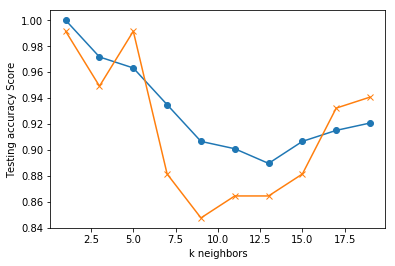

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
# Note that k: 17 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test, y_test))

k=17 Test Acc: 0.847


In [11]:
# save the model to disk
filename = 'Model/finalized_mpg_model_KN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [12]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [13]:
df = pd.read_csv('Resources/encoded_output.csv')
new_df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)


In [14]:

newX = new_df.drop('cmb_mpg', axis=1)
newy = new_df['cmb_mpg']
print(newy)

0    2
1    0
2    2
3    0
4    1
5    1
6    1
7    2
Name: cmb_mpg, dtype: int64


In [15]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(newy)
print(newX)

   Resale_Cat  fuel_type  vehicle_class  trans  drive  smog_rating  city_mpg  \
0           1          1              0      6      1            5        16   
1           1          1              5      4      0            6        25   
2           1          1              0      6      0            9        18   
3           1          0              1      0      0           10       126   
4           0          1              4      5      1            6        17   
5           0          1              2      3      0            5        16   
6           0          1              3      1      1            6        17   
7           0          1              2      2      0            6        19   

   hwy_mpg  Greenhouse_gas_score  smartway  comb_CO2  Sales_2016  Sales_2017  \
0       25                     4         1       459       12071        8731   
1       33                     7         2       312       14380       11467   
2       27                     5       

In [16]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(newX, newy)

In [17]:
print(result)

1.0


In [18]:
ynew = loaded_model.predict(newX)

In [19]:
print (ynew)

[2 0 2 0 1 1 1 2]
